In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [3]:
wine_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

In [4]:
col_names = '''Target, Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, \
Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, \
Color intensity, Hue, OD280/OD315 of diluted wines, Proline'''.split(', ')

In [5]:
wine = pd.read_csv(wine_url, header=None, names=col_names)

wine.head()

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Target                          178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [10]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
1,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
2,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
3,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
4,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
5,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
6,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
7,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
8,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
9,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


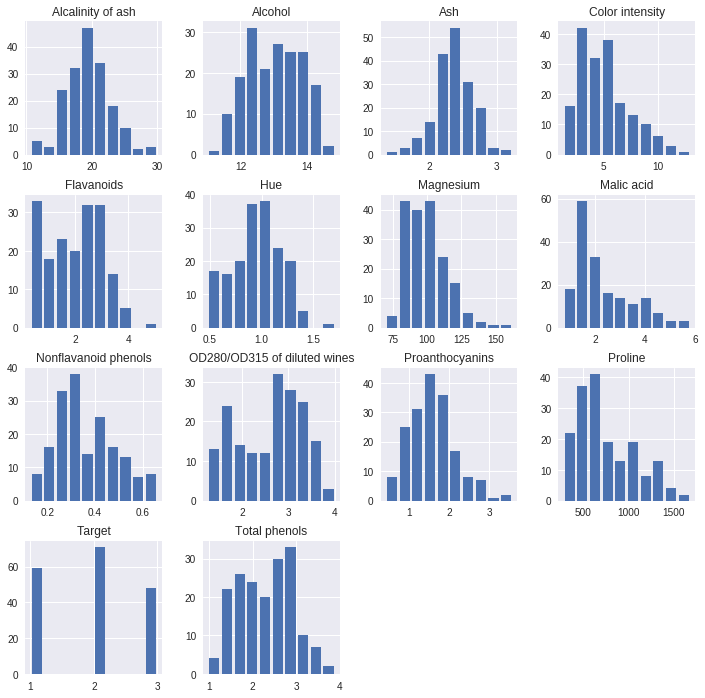

In [27]:
_ = wine.hist(figsize=(12, 12), rwidth=.8)

In [24]:
wine.applymap(str).describe(include=["O"]).T

,count,unique,top,freq
Target,178,3,2,71
Alcohol,178,126,12.37,6
Malic acid,178,133,1.73,7
Ash,178,79,2.3,7
Alcalinity of ash,178,63,20.0,15
Magnesium,178,53,88,13
Total phenols,178,97,2.2,8
Flavanoids,178,132,2.65,4
Nonflavanoid phenols,178,39,0.26,11
Proanthocyanins,178,101,1.35,9


In [25]:
wine.Target.value_counts()

2    71
1    59
3    48
Name: Target, dtype: int64

In [7]:
y = wine['Target'].values
X = wine.drop('Target', axis=1)

X.shape, y.shape

((178, 13), (178,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0, stratify=y)

In [9]:
sc = StandardScaler()

In [11]:
X_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [59]:
cov = np.cov(X_std.T)
cov.shape

(13, 13)

In [76]:
# col = eigen_vec
e_vals, e_vecs = np.linalg.eig(cov)
e_vals.shape, e_vecs.shape

((13,), (13, 13))

In [77]:
e_vals

array([ 4.84274532,  2.41602459,  1.54845825,  0.96120438,  0.84166161,
        0.6620634 ,  0.51828472,  0.34650377,  0.3131368 ,  0.10754642,
        0.21357215,  0.15362835,  0.1808613 ])

In [81]:
e_vals_sorted = np.sort(e_vals)[::-1] / e_vals.sum()
e_cumsum = e_vals_sorted.cumsum()

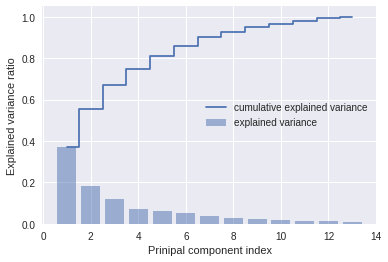

In [87]:
plt.bar(range(1, 14), e_vals_sorted, align='center', alpha=.5, label='explained variance')
plt.step(range(1, 14), e_cumsum, where='mid', label='cumulative explained variance')
plt.xlabel('Prinipal component index')
plt.ylabel('Explained variance ratio')
plt.legend()

In [99]:
idx_sort = np.argsort(e_vals)[::-1]

In [100]:
idx_sort

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 11,  9])

In [105]:
W = e_vecs[:, idx_sort][:, :2]
W

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

In [108]:
X_train_pca = np.dot(X_std, W)
X_train_pca.shape

(124, 2)

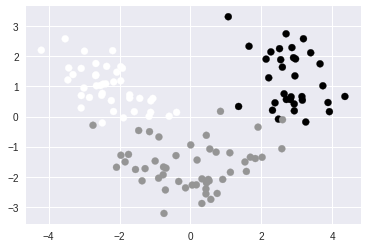

In [109]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)

In [63]:

def plot_decision_region(X, y, clf, resolution=0.02):
    
    from matplotlib.colors import ListedColormap
    n_class = len(np.unique(y))
    #colors = ('red', 'blue', 'green', 'yellow', 'gray', 'cyan')
    #cmap = ListedColormap(colors[:n_class])
    
    x1_min, x2_min = X.min(axis=0) - .1
    x1_max, x2_max = X.max(axis=0) + .1
    X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                         np.arange(x2_min, x2_max, resolution))
    Z = clf.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
    
    plt.contourf(X1, X2, Z, alpha=.4, cm=plt.cm.jet, vmin=1, vmax=3)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet, alpha=.4)

In [155]:
pca = PCA(n_components=2)
lr = LogisticRegression()

X_train_pca = pca.fit_transform(X_std)
X_test_pca = pca.transform(sc.transform(X_test))


In [156]:
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

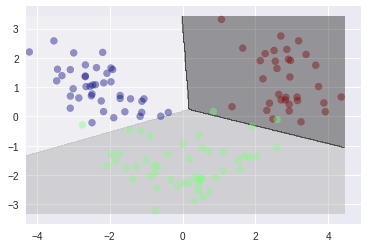

In [157]:
plot_decision_region(X_train_pca, y_train, lr)

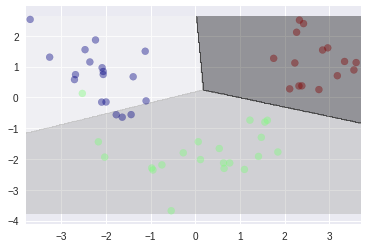

In [158]:
plot_decision_region(X_test_pca, y_test, lr)

In [159]:
pca = PCA(n_components=None)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [160]:
pca.explained_variance_ratio_

array([ 0.36951469,  0.18434927,  0.11815159,  0.07334252,  0.06422108,
        0.05051724,  0.03954654,  0.02643918,  0.02389319,  0.01629614,
        0.01380021,  0.01172226,  0.00820609])

### Linear Discriminant Analysis (LDA)

#### Step 1: standardize dataset
#### Step 2: compute d-mean vector for each class

In [16]:
mean_vecs = []
for label in np.unique(y):
    mean_vecs.append(X_std[y_train==label, :].mean(axis=0))
    print("MV {}: {}".format(label, mean_vecs[-1]))

MV 1: [ 0.9065826  -0.34973457  0.32010329 -0.71891449  0.50558678  0.88069702
  0.95894709 -0.55161049  0.54159322  0.23383109  0.58971299  0.65631399
  1.20749382]
MV 2: [-0.87487963 -0.28480003 -0.37347228  0.31571225 -0.38480347 -0.04332505
  0.06345321 -0.09460613  0.07034749 -0.82860474  0.31436962  0.36084258
 -0.72528643]
MV 3: [ 0.199215    0.8660339   0.168163    0.41484489 -0.04511771 -1.02855532
 -1.28756034  0.82867687 -0.77947565  0.96494432 -1.20899133 -1.36215159
 -0.40130076]


#### Step 3:  compute the between-class scatter matrix $S_B$ and the within-class scatter matrix $S_W$

In [28]:
d = X_std.shape[1]    # d dimension
Sw = np.zeros((d, d)) 
for label, mean_vec in zip(np.unique(y), mean_vecs):
    mask = (y_train==label)
    Sw += np.cov(X_std[mask, :].T)

In [32]:
mean_all = X_std.mean(axis=0)
Sb = np.zeros_like(Sw)
for label, mean_vec in zip(np.unique(y), mean_vecs):
    n = (y_train == label).sum()
    vec = (mean_vec - mean_all)[:, np.newaxis]
    Sb += n * np.dot(vec, vec.T)

In [34]:
Sb.shape, Sw.shape

((13, 13), (13, 13))

In [35]:
Sb[0]

array([ 73.27794894,   5.15208214,  29.34088701, -37.80525118,
        35.32883124,  27.86879784,  24.40371442, -10.9170498 ,
        11.92933234,  51.2815813 ,   0.21976199,  -0.34448852,  73.97113514])

#### Step 4-5: compute eigenvectors and eigenvalues of matrix: ${S_W}^{-1}S_B$ and sort eigenvalues by decresing order

In [38]:
e_vals, e_vecs = np.linalg.eig(np.dot(np.linalg.inv(Sw), Sb))

In [41]:
idx_sort = np.argsort(e_vals)[::-1]

In [44]:
e_vals[idx_sort].round(2)

array([ 349.62+0.j,  172.76+0.j,    0.00+0.j,    0.00+0.j,    0.00+0.j,
          0.00-0.j,   -0.00+0.j,   -0.00+0.j,   -0.00-0.j,   -0.00+0.j,
         -0.00-0.j,   -0.00+0.j,   -0.00-0.j])

In [47]:
var_ratio = e_vals[idx_sort].real / e_vals.sum().real
var_cumsum = var_ratio.cumsum()

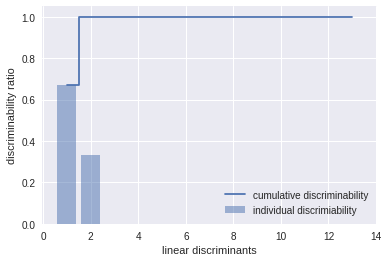

In [51]:
plt.bar(range(1, len(e_vals)+1), var_ratio, alpha=.5, label='individual discrimiability')
plt.step(range(1, len(e_vals)+1), var_cumsum, where='mid', label='cumulative discriminability')
plt.legend()
plt.xlabel('linear discriminants')
plt.ylabel('discriminability ratio')

#### Step 6-7: choose c-1 eigenvecs and create  a (d, c-1) transformation matrix W

In [54]:
W = e_vecs[:, idx_sort][:, :2].real

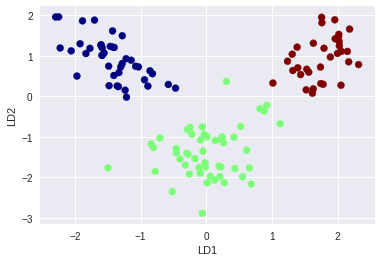

In [59]:
X_train_lda = np.dot(X_std, W)
plt.scatter(X_train_lda[:, 0], -X_train_lda[:, 1], c=y_train, cmap=plt.cm.jet)
plt.xlabel('LD1')
plt.ylabel('LD2')

### scikit-learn: LDA 

In [62]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_std, y_train)

In [64]:
lr = LogisticRegression().fit(X_train_lda, y_train)

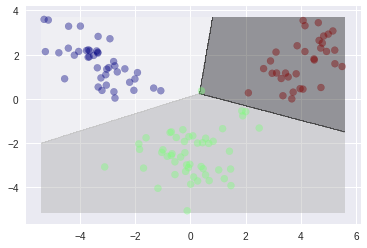

In [65]:
plot_decision_region(X_train_lda, y_train, lr)

In [66]:
X_test_lda = lda.transform(X_test_std)

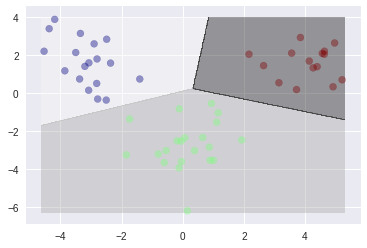

In [68]:
plot_decision_region(X_test_lda, y_test, lr)

### Kernel Principal Component Analysis

In [69]:
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel, sigmoid_kernel

In [73]:
from sklearn.datasets import make_moons

In [98]:
def rbf_kernel_pca(X, gamma, n_components):
    '''
    RBF kernel PCA implementation.
    
    Parameters
    ----------
    X : ndarray, shape = [n_samples, n_features]
    
    gamma : float
        Tuning parameter of the RBF kernel
        
    n_components : int
        Number of principal components to returns
        
    Return
    ------
    X_pc : ndarray, shape = [n_samples, n_components]
        Projected dataset
    '''
    from scipy.spatial.distance import pdist, squareform
    from scipy import exp
    from scipy.linalg import eigh
    
    # calculate pairwise euclidean distances
    dist = pdist(X, metric='sqeuclidean')        # vector size = M*M
    dist = squareform(dist)                      # metrix [M, M]
    
    # compute rbf kernel
    K = exp(-gamma * dist)
    
    # center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # compute eigenval, eigenvecs
    e_vals, e_vecs = eigh(K)
    idx = np.argsort(e_vals)[::-1]
    e_vals, e_vecs = e_vals[idx], e_vecs[:, idx]     # in descending order
    
    # select first n_components
    X_pc = e_vecs[:, :n_components]
    return X_pc

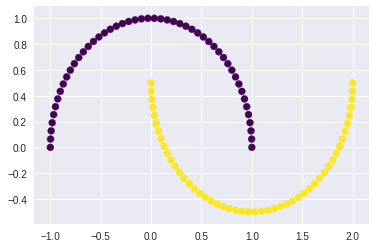

In [83]:
X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

In [84]:
linear_pca = PCA(n_components=2)
X_linear_pca = linear_pca.fit_transform(X)

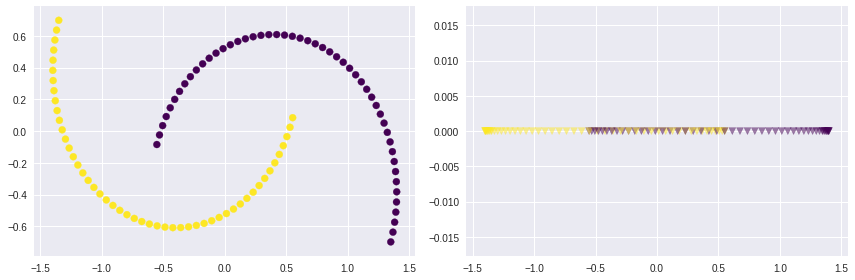

In [95]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[1].scatter(X_linear_pca[:, 0], np.zeros(X.shape[0]), c=y, marker='v', alpha=.5, cmap='viridis')

ax[0].scatter(X_linear_pca[:, 0], X_linear_pca[:, 1], c=y, cmap='viridis')


fig.tight_layout()

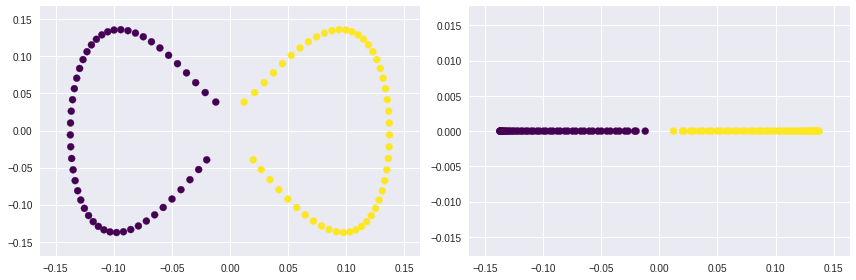

In [112]:
X_rbf = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].scatter(X_rbf[:, 0], X_rbf[:, 1], c=y, cmap='viridis')
ax[1].scatter(X_rbf[:, 0], np.zeros(len(X)), c=y, cmap='viridis')
fig.tight_layout()

In [113]:
from sklearn.datasets import make_circles

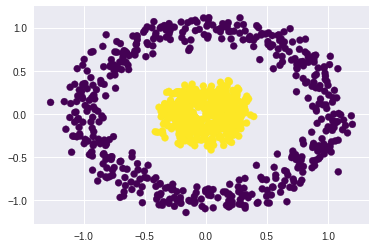

In [118]:
X, y = make_circles(n_samples=1000, random_state=123, noise=.1, factor=.2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

In [119]:
X_pca = linear_pca.fit_transform(X)


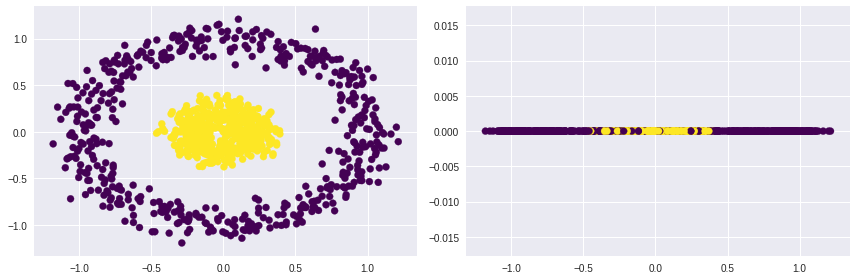

In [120]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
ax[1].scatter(X_pca[:, 0], np.zeros(len(X_pca)), c=y, cmap='viridis')
fig.tight_layout()

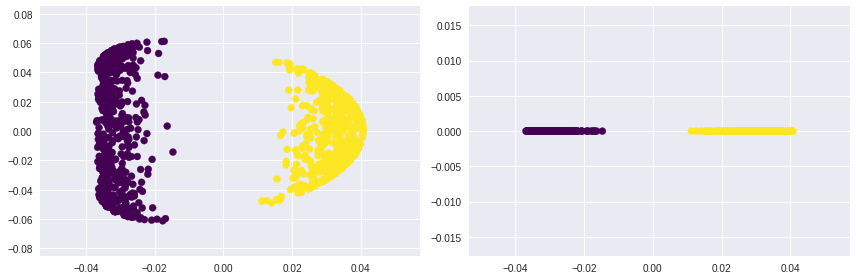

In [124]:
X_rbf = rbf_kernel_pca(X, gamma=2, n_components=2)

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].scatter(X_rbf[:, 0], X_rbf[:, 1], c=y, cmap='viridis')
ax[1].scatter(X_rbf[:, 0], np.zeros(len(X_pca)), c=y, cmap='viridis')
fig.tight_layout()

In [125]:
from sklearn.base import BaseEstimator, TransformerMixin

In [156]:
class RBF_Kernel(BaseEstimator, TransformerMixin):
    
    def __init__(self, gamma, n_components):
        self.gamma = gamma
        self.n_components = n_components
        
    def fit(self, X, y=None):
        return self._rbf_kernel(X)
    
    def transform(self, X):
        # only transform
        if hasattr(self, 'alphas_'):
            return self._project(X)
        # fit & transform
        else:
            return self.alphas_.T.copy()
        
        
    def _rbf_kernel(self, X):
        from scipy.spatial.distance import pdist, squareform
        from scipy import exp
        from scipy.linalg import eigh
        
        # distance metrix
        dist = squareform(pdist(X, metric='sqeuclidean'))
        
        # Kernel metrix
        K = exp(-self.gamma * dist)
        
        # centered Kernel matrix
        N = K.shape[0]
        one_N = np.ones((N, N)) / N
        K = K - one_N.dot(K) - K.dot(one_N) + one_N.dot(K).dot(one_N)
        
        # eigenvalues & eigenvectors
        eigen_vals, eigen_vecs = eigh(K)
        idx_sort = np.argsort(eigen_vals)[::-1]   # descending order
        self.lambdas_ = eigen_vals[idx_sort][:self.n_components]
        self.alphas_ = eigen_vecs[:, idx_sort][:, :self.n_components]
        self.X_ = X.copy()
        
        return self
    
    def _project(self, X):
        # convert to row matrix
        if len(X.shape) == 1:
            X = X[np.newaxis, :]
        
        dist = ((self.X_[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2).sum(axis=-1)
        k = np.exp(-self.gamma * dist)   # size [n_Xtrain, n_newX]
        return np.dot((self.alphas_ / self.lambdas_).T, k).T

In [136]:
X, y = make_moons(n_samples=100, random_state=123)

In [137]:
my_rbf = RBF_Kernel(gamma=15, n_components=1)

In [138]:
my_rbf.fit(X)

RBF_Kernel(gamma=15, n_components=1)

In [139]:
my_rbf.alphas_[25]

array([ 0.07877284])

In [140]:
X_new = X[25]
X_new

array([ 1.8713187 ,  0.00928245])

In [141]:
my_rbf.transfom(X_new)

array([[ 0.07877284]])

In [157]:
X_mykernel = RBF_Kernel(n_components=2, gamma=15).fit_transform(X)

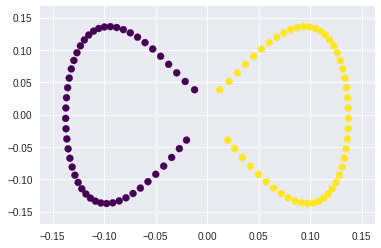

In [160]:
plt.scatter(X_mykernel[:, 0], X_mykernel[:, 1], c=y, cmap='viridis')

In [142]:
from sklearn.decomposition import KernelPCA

In [144]:
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=2).fit(X, y)

In [145]:
X_kpca = kpca.transform(X)

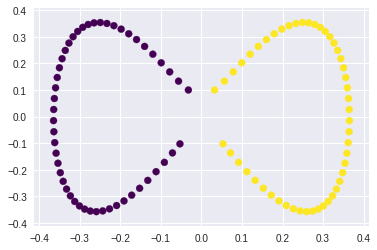

In [146]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis')